In [ ]:
'''
SMOTE Definition:
SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning
to address class imbalance by generating synthetic samples for the minority class.
(Synthetic samples means that new samples are created based on the existing minority class samples
by interpolating between them, rather than simply duplicating existing samples.)

SMOTE (Synthetic Minority Over-sampling Technique) implementation steps:
1. Identify the minority class samples in the dataset.
2. For each minority class sample, find its k nearest neighbors (k is a parameter).
3. Randomly select one of the k nearest neighbors.
4. Create a synthetic sample by interpolating between the minority class sample and the selected neighbor.


'''

In [2]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [4]:
X, y= make_classification(n_samples=1000, n_features=2,n_clusters_per_class=1, weights=[0.9], 
                    random_state=12,  n_redundant=0)

In [5]:
import pandas as pd
df1 = pd.DataFrame(X, columns=['feature1', 'feature2'])
df2 = pd.DataFrame(y, columns=['target'])
df = pd.concat([df1, df2], axis=1)
df.head()


,feature1,feature2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [6]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

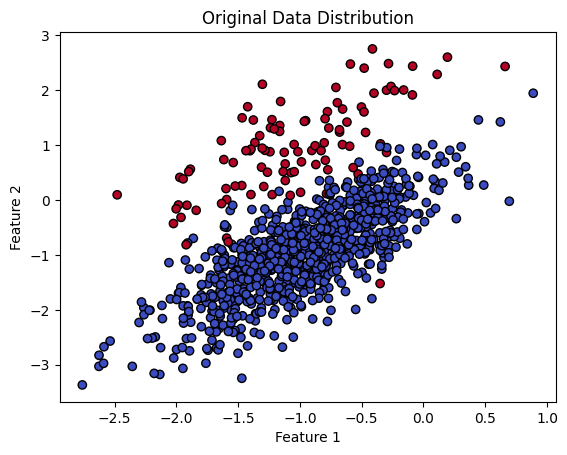

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df['feature1'], df['feature2'], c=df['target'], cmap='coolwarm', edgecolor='k')
plt.title('Original Data Distribution')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [8]:
# imblearn library provides SMOTE implementation
# for imbalanced datasets to generate synthetic samples
# transform the dataset using SMOTE
smote = SMOTE()
X,y = smote.fit_resample(df[['feature1', 'feature2']], df['target'])

In [9]:
X.shape, y.shape

((1800, 2), (1800,))

In [ ]:
len(y[y==0]), len(y[y==1])


(900, 900)

In [15]:
df1 = pd.DataFrame(X, columns=['feature1', 'feature2'])
df2 = pd.DataFrame(y, columns=['target'])
oversampled_df = pd.concat([df1, df2], axis=1)
oversampled_df.head()

,feature1,feature2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


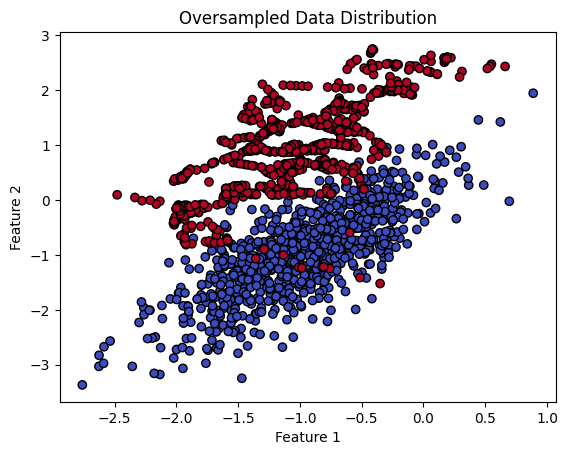

In [16]:
plt.scatter(oversampled_df['feature1'], oversampled_df['feature2'], c=oversampled_df['target'], cmap='coolwarm', edgecolor='k')
plt.title('Oversampled Data Distribution')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()